# Decision Tree

In [ ]:
import pandas as pd 
data=pd.read_csv("titanic-passengers_preprocessed.csv")
data=data.drop(["Unnamed: 0"],axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Cabin       889 non-null    int64  
 7   Embarked    889 non-null    int64  
 8   female      889 non-null    int64  
 9   male        889 non-null    int64  
 10  Title       889 non-null    object 
 11  FamilySize  889 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.5+ KB


In [ ]:
dictt={"Survived":{0:'No',1:'Yes'}}
data.replace(dictt,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,Title,FamilySize
0,No,2,28.0,0,0,13.0000,144,2,0,1,Mrs,0
1,No,3,25.0,0,0,7.6500,139,2,0,1,Mrs,0
2,No,3,20.0,0,0,7.8542,144,2,0,1,Mrs,0
3,No,3,29.0,0,4,21.0750,144,2,1,0,Mrs,4
4,No,1,31.0,1,0,52.0000,37,2,0,1,Mrs,1


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Title"]=encoder.fit_transform(data["Title"])
x=data.drop(["Survived"],axis=1)
y=data["Survived"]
x_train, x_vt, y_train, y_vt = train_test_split(x, y, test_size=0.4, random_state=0)
x_validation, x_test, y_validation, y_test = train_test_split(x_vt, y_vt, test_size=0.5, random_state=0)
model=DecisionTreeClassifier() 
model.fit(x_train,y_train)
y_predict=model.predict(x_train)
print("accuracy of descision tree on the train data set",accuracy_score(y_predict,y_train))
y_predictt=model.predict(x_test)
print("accuracy of descision tree on the test data set",accuracy_score(y_predictt,y_test))

accuracy of descision tree on the train data set 0.9906191369606003
accuracy of descision tree on the test data set 0.797752808988764



*   trainng accuracy 1 -> expected 
*   The accuracy on test data is much lower : overfit the data





In [ ]:
#change parameters
model2=DecisionTreeClassifier(max_features=5,max_depth=3)
model2.fit(x_train,y_train)
y_predict=model2.predict(x_train)
print("accuracy of descision tree on the train data set",accuracy_score(y_predict,y_train))
y_predictt=model2.predict(x_test)
print("accuracy of descision tree on the test data set",accuracy_score(y_predictt,y_test))

accuracy of descision tree on the train data set 0.8105065666041276
accuracy of descision tree on the test data set 0.8651685393258427



*  Training accuracy is predictably lower as i restrcited  decision tree, so it does not fit perfectly to training data because of its constraints 

*  the gap between The accuracy on test and training accuracy is lower (maybe not overfitting ) 


**Validation**

In [ ]:
y_validationn=model2.predict(x_validation)
print("accuracy of descision tree on the validation data set",accuracy_score(y_validationn,y_validation))

accuracy of descision tree on the validation data set 0.7865168539325843




*    The accuracy on test data, on validation data and on training data are close to each other (not overfitting) 


**Visualisation**

In [ ]:

from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image


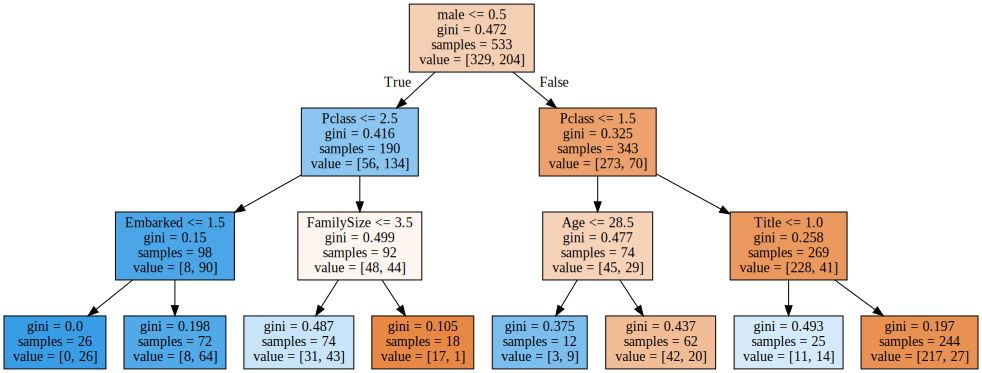

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model2, out_file=None, feature_names=x.columns,filled=True 
)

graph = graphviz.Source(dot_data, format="png") 
graph

manual prediction :females with Pclass = 1 and number cabin <= 4 have survived of the three of them  

**Pruning**


In [ ]:
model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00012508 0.00012508 0.00015635 0.00020846 0.00021889
 0.00030322 0.0003936  0.00062539 0.00084428 0.00093809 0.00107084
 0.00118397 0.00121281 0.00125078 0.00147528 0.00150094 0.00156348
 0.00156348 0.00158255 0.00164165 0.00164165 0.00166119 0.00168856
 0.00175891 0.00177194 0.00184326 0.0018449  0.00190378 0.00191028
 0.00195956 0.00202585 0.00225141 0.00230713 0.00249165 0.00250156
 0.00257417 0.00257603 0.00276309 0.00281426 0.00300188 0.00312695
 0.00322812 0.00351782 0.00358483 0.00364811 0.00417202 0.00505682
 0.00506329 0.00603659 0.0061402  0.00736271 0.00751251 0.01500399
 0.01834712 0.03448884 0.11524269]
[0.01225766 0.01238274 0.01250782 0.01266417 0.01287263 0.01309152
 0.01339474 0.01418194 0.01480733 0.01818444 0.01912253 0.02233506
 0.03299076 0.04026763 0.04276919 0.04719504 0.05319879 0.05632574
 0.0594527  0.06261781 0.06590111 0.06918441 0.07582919 0.0792063
 0.08272412 0.086268   0.08995452 0.09364432 0.10125943 0.11081086
 0.11668953 0.11871539 0.120

In [ ]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11524269491211286


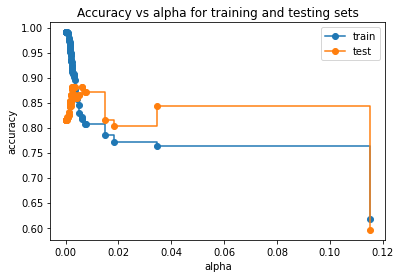

In [ ]:
import matplotlib.pyplot as plt
train_scores = [model.score(x_train, y_train) for model in models]
test_scores = [model.score(x_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()



*   When ccp_alpha is set to zero  the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.00358483 maximizes the testing accuracy.



In [ ]:
model2=DecisionTreeClassifier(ccp_alpha=0.00358483)
model2.fit(x_train,y_train)
y_predict=model2.predict(x_train)
print("accuracy of descision tree on the train data set",accuracy_score(y_predict,y_train))
y_predictt=model2.predict(x_test)
print("accuracy of descision tree on the test data set",accuracy_score(y_predictt,y_test))

accuracy of descision tree on the train data set 0.8761726078799249
accuracy of descision tree on the test data set 0.8595505617977528


In [ ]:
y_validationn=model2.predict(x_validation)
print("accuracy of descision tree on the validation data set",accuracy_score(y_validationn,y_validation))

accuracy of descision tree on the validation data set 0.8089887640449438


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [ ]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
forest.fit(x_train,y_train)
y_predict=forest.predict(x_train)
print("accuracy of descision tree on the train data set",accuracy_score(y_predict,y_train))
y_predictt=forest.predict(x_test)
print("accuracy of descision tree on the test data set",accuracy_score(y_predictt,y_test))


accuracy of descision tree on the train data set 0.9906191369606003
accuracy of descision tree on the test data set 0.848314606741573


In [ ]:
y_validationn=forest.predict(x_validation)
print("accuracy of descision tree on the validation data set",accuracy_score(y_validationn,y_validation))

accuracy of descision tree on the validation data set 0.7584269662921348



*  descision trees tend to overfit ,Random Forest reduced the gap between the accuracy of the training ,test and validation dataset  but we still have overfitting  




In [ ]:
forest2=RandomForestClassifier(n_estimators=150,max_depth=5)
forest2.fit(x_train,y_train)
y_predict=forest2.predict(x_train)
print("accuracy of descision tree on the train data set",accuracy_score(y_predict,y_train))
y_predictt=forest2.predict(x_test)
print("accuracy of descision tree on the test data set",accuracy_score(y_predictt,y_test))


accuracy of descision tree on the train data set 0.8649155722326454
accuracy of descision tree on the test data set 0.8707865168539326


In [ ]:
y_validationn=forest2.predict(x_validation)
print("accuracy of descision tree on the validation data set",accuracy_score(y_validationn,y_validation))

accuracy of descision tree on the validation data set 0.8202247191011236
